In [1]:
import pandas as pd

In [2]:
retail = pd.read_csv("/content/drive/MyDrive/데이터분석/OnlineRetail.csv")
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
pd.options.display.max_rows = 6 # 위 아래 3개씩 보이는 옵션

In [4]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* invoiceNo : 주문번호
* StockCode : 상품코드
* Description : 상품설명
* Quantity : 주문수량  
* InvoiceDate : 주문날짜
* UnitPrice : 상품가격
* CustomerID : 고객 아이디
* Country : 고객거주지역(국가)

In [6]:
pd.options.display.max_rows = 10
# 각 필드당 null이 몇개 있는지 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# 각 필드당 null이 몇 % 있는지 확인
retail.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [8]:
# 비회원을 제거
retail = retail[pd.notnull(retail["CustomerID"])]

In [9]:
len(retail)

406829

In [10]:
# 주문 수량이 0이하인 데이터 확인 
retail[retail["Quantity"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [11]:
# 구입 가격이 0이하인 데이터 확인
retail[retail["UnitPrice"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
...,...,...,...,...,...,...,...,...
479079,577129,22464,HANGING METAL HEART LANTERN,4,11/17/2011 19:52,0.0,15602.0,United Kingdom
479546,577168,M,Manual,1,11/18/2011 10:42,0.0,12603.0,Germany
480649,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,11/18/2011 13:23,0.0,12444.0,Norway
485985,577696,M,Manual,1,11/21/2011 11:57,0.0,16406.0,United Kingdom


In [12]:
# 주문 수량이 1이상인 데이터 저장 
retail = retail[retail["Quantity"] >= 1]

In [13]:
# 구입 가격이 1이상인 데이터 저장
retail = retail[retail["UnitPrice"] >= 1]

In [14]:
retail 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
len(retail)

304911

In [17]:
# 고객의 총 지출비용(CheckoutPrice) 파생변수 구하기
# 수량 * 가격
retail["CheckoutPrice"] = retail["UnitPrice"] * retail["Quantity"]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [19]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304911 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      304911 non-null  object 
 1   StockCode      304911 non-null  object 
 2   Description    304911 non-null  object 
 3   Quantity       304911 non-null  int64  
 4   InvoiceDate    304911 non-null  object 
 5   UnitPrice      304911 non-null  float64
 6   CustomerID     304911 non-null  float64
 7   Country        304911 non-null  object 
 8   CheckoutPrice  304911 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 23.3+ MB


In [21]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [25]:
# object -> datatime으로 바꿈
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])

In [26]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304911 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      304911 non-null  object        
 1   StockCode      304911 non-null  object        
 2   Description    304911 non-null  object        
 3   Quantity       304911 non-null  int64         
 4   InvoiceDate    304911 non-null  datetime64[ns]
 5   UnitPrice      304911 non-null  float64       
 6   CustomerID     304911 non-null  float64       
 7   Country        304911 non-null  object        
 8   CheckoutPrice  304911 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 23.3+ MB


In [28]:
# 전체매출 구하기
total_revenue = retail["CheckoutPrice"].sum()
total_revenue

7863916.5

In [30]:
# 몇 개국에서 주문했는지 계산
retail["Country"].value_counts()

United Kingdom    271313
Germany             6923
France              6335
EIRE                5654
Spain               1983
                   ...  
Lithuania             35
Brazil                31
Bahrain               17
Czech Republic        14
Saudi Arabia           8
Name: Country, Length: 37, dtype: int64

In [33]:
# 열 늘려주기
pd.options.display.max_rows = 40

In [35]:
retail["Country"].value_counts()

United Kingdom          271313
Germany                   6923
France                    6335
EIRE                      5654
Spain                     1983
Netherlands               1723
Belgium                   1536
Switzerland               1403
Portugal                  1130
Australia                  945
Norway                     836
Italy                      646
Channel Islands            618
Cyprus                     535
Finland                    508
Austria                    314
Sweden                     290
Denmark                    289
Poland                     275
Japan                      220
Unspecified                191
Israel                     177
Singapore                  167
Iceland                    139
USA                        131
Greece                     122
Malta                      102
Canada                     101
RSA                         54
European Community          52
United Arab Emirates        51
Lebanon                     43
Lithuani

In [36]:
# 다시 원래대로 되돌리기
pd.options.display.max_rows = 10

In [42]:
# 국가별 매출 구하기
rev_by_contries = retail.groupby("Country")["CheckoutPrice"].sum().sort_values() # 나라별로 그룹을 맺고, CheckoutPrice를 모두 더하고, 오름차순 정렬 시킴
rev_by_contries

Country
Saudi Arabia          140.88
Bahrain               548.40
Czech Republic        586.66
RSA                   981.97
Brazil               1123.20
                     ...    
France             183549.73
Germany            202050.01
EIRE               236665.02
Netherlands        245279.99
United Kingdom    6459137.29
Name: CheckoutPrice, Length: 37, dtype: float64

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'United Arab Emirates'),
 Text(7, 0, 'Lithuania'),
 Text(8, 0, 'Lebanon'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Sweden'),
 Text(25, 0, 'Portugal'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Norway'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

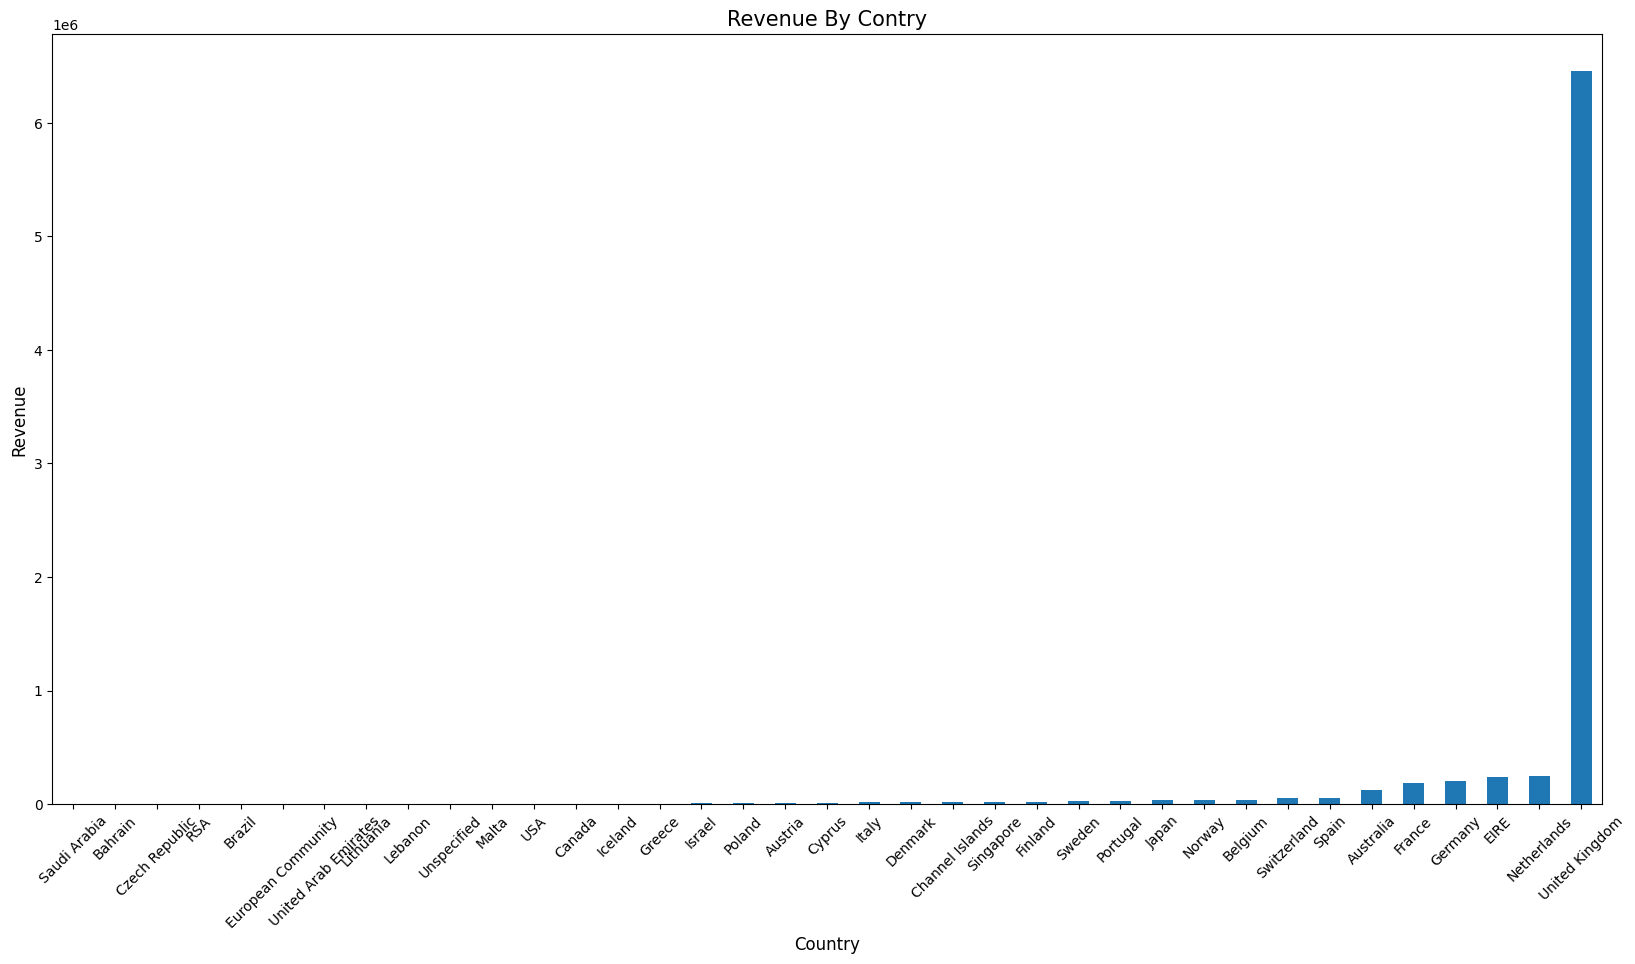

In [46]:
# plot 객체 생성
plot = rev_by_contries.plot(kind="bar", figsize=(20, 10)) # kind = "bar" 막대그래프
plot.set_xlabel("Country", fontsize=12)
plot.set_ylabel("Revenue", fontsize=12)
plot.set_title("Revenue By Contry", fontsize=15)
plot.set_xticklabels(labels=rev_by_contries.index, rotation=45) # 눈금을 나라이름으로 설정

In [48]:
# 나라별 매출 % 구하기
rev_by_contries / total_revenue

Country
Saudi Arabia      0.000018
Bahrain           0.000070
Czech Republic    0.000075
RSA               0.000125
Brazil            0.000143
                    ...   
France            0.023341
Germany           0.025693
EIRE              0.030095
Netherlands       0.031191
United Kingdom    0.821364
Name: CheckoutPrice, Length: 37, dtype: float64

In [51]:
# 월별 매출 구하기
retail["InvoiceDate"].sort_values(ascending=False) # 날짜 내림차순 정렬

541908   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541903   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 304911, dtype: datetime64[ns]

In [52]:
# 예) 2011-03-01 입력
def extract_month(date):
    month = str(date.month) # 3
    if date.month <10:
        month = "0" + month # 03
    return str(date.year) + month # 201103

In [55]:
rev_by_month = retail.set_index("InvoiceDate").groupby(extract_month)["CheckoutPrice"].sum() # groupby 안에 익명함수나 콜백함수를 넣으면 모든 데이터에 대입하게됨
rev_by_month

InvoiceDate
201012     509239.10
201101     516132.35
201102     388097.54
201103     521947.66
201104     403484.66
             ...    
201108     564748.05
201109     839985.55
201110     918071.63
201111    1028772.36
201112     474144.60
Name: CheckoutPrice, Length: 13, dtype: float64

In [56]:
# plot 만들어주는 함수 선언
def plot_bar(df, xlabel, ylabel, title, rotation=45,titlesize=15,fontsize=12,figsize=(20,10)):
    plot = df.plot(kind="bar", figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=fontsize)
    plot.set_ylabel(ylabel, fontsize=fontsize)
    plot.set_title(title, fontsize=titlesize)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

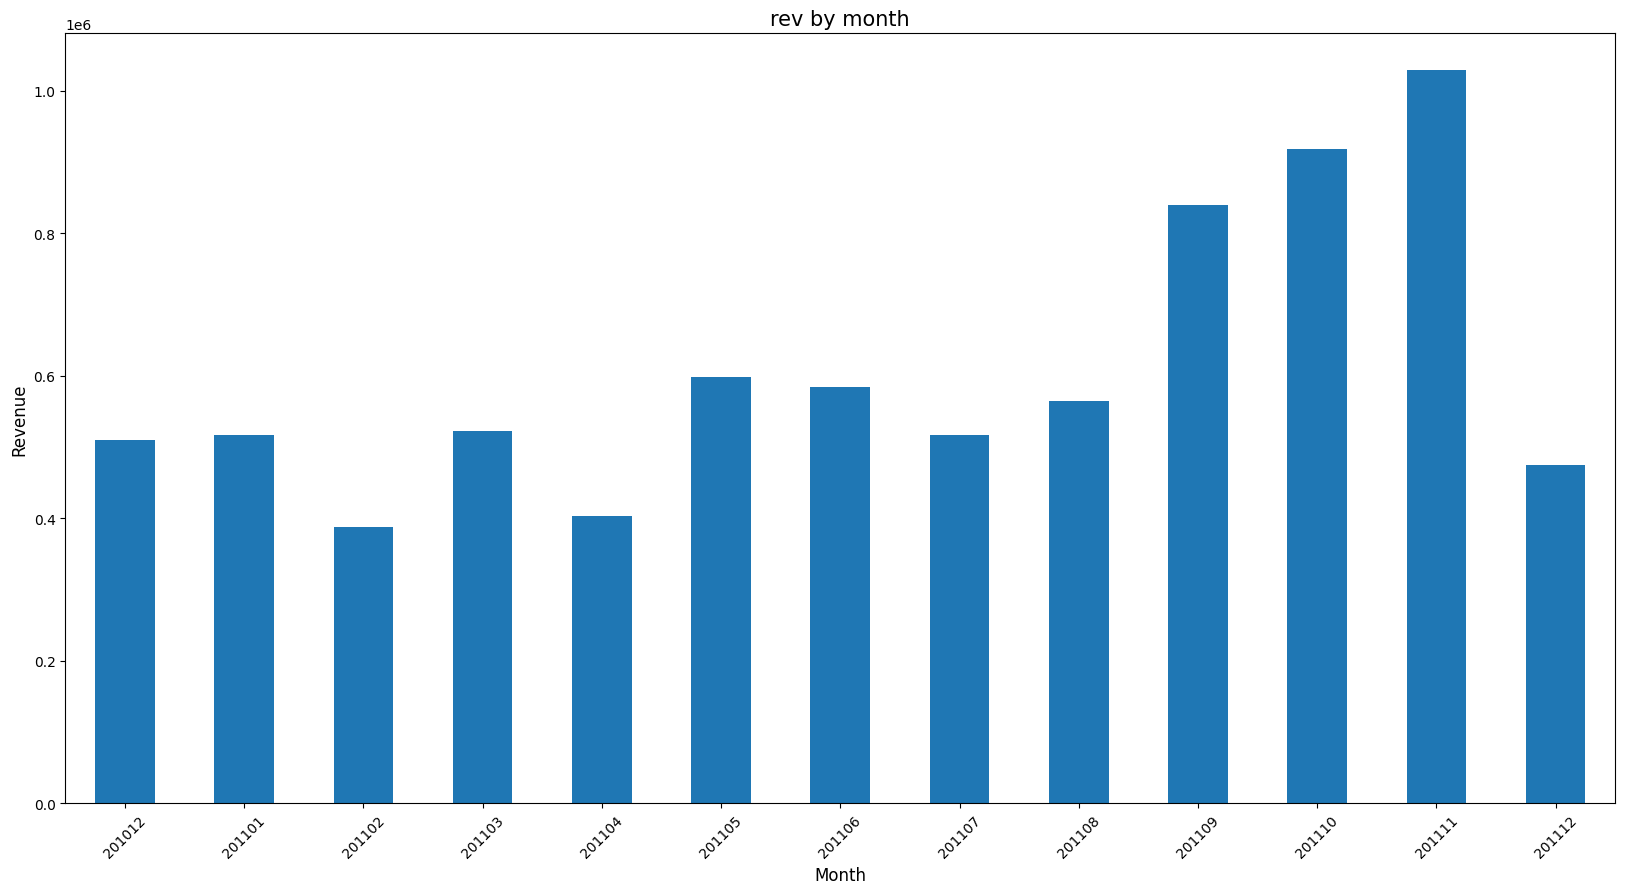

In [58]:
plot_bar(rev_by_month, "Month", "Revenue", "rev by month")

In [71]:
# 요일별 매출 구하기
def extract_dow(date):
    return date.dayofweek

In [72]:
rev_by_dow = retail.set_index("InvoiceDate").groupby(lambda date: date.dayofweek)["CheckoutPrice"].sum() # 람다 사용

In [73]:
rev_by_dow

InvoiceDate
0    1207916.45
1    1509635.68
2    1386213.36
3    1739873.53
4    1329026.13
6     691251.35
Name: CheckoutPrice, dtype: float64

In [74]:
import numpy as np

In [75]:
DAY_OF_WEEK = np.array(["Mon", "Tue", "Web", "Thur", "Fri", "Sat", "Sun"])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

In [76]:
rev_by_dow

Mon     1207916.45
Tue     1509635.68
Web     1386213.36
Thur    1739873.53
Fri     1329026.13
Sun      691251.35
Name: CheckoutPrice, dtype: float64

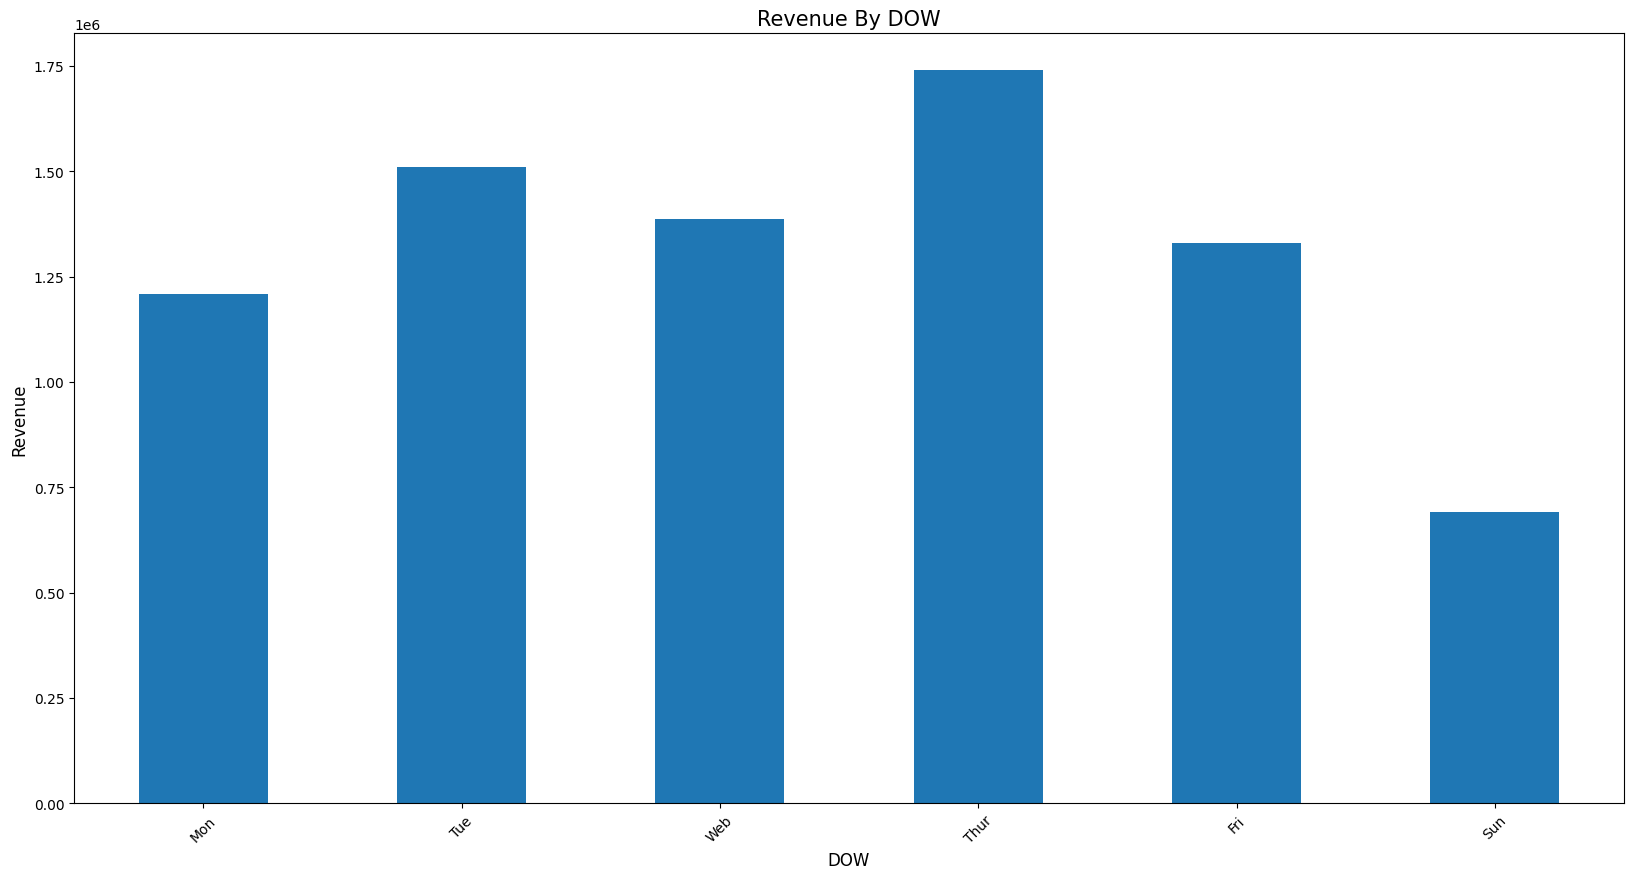

In [78]:
plot_bar(rev_by_dow, "DOW", "Revenue", "Revenue By DOW")

In [81]:
# 시간대별 매출 구하기
rev_by_hour = retail.set_index("InvoiceDate").groupby(lambda date: date.hour)["CheckoutPrice"].sum() # 람다 사용

In [97]:
rev_by_hour

InvoiceDate
6           4.25
7       28326.65
8      250730.92
9      757407.81
10    1110115.45
         ...    
16     418520.35
17     208414.41
18      94131.78
19      42280.07
20      17505.85
Name: CheckoutPrice, Length: 15, dtype: float64

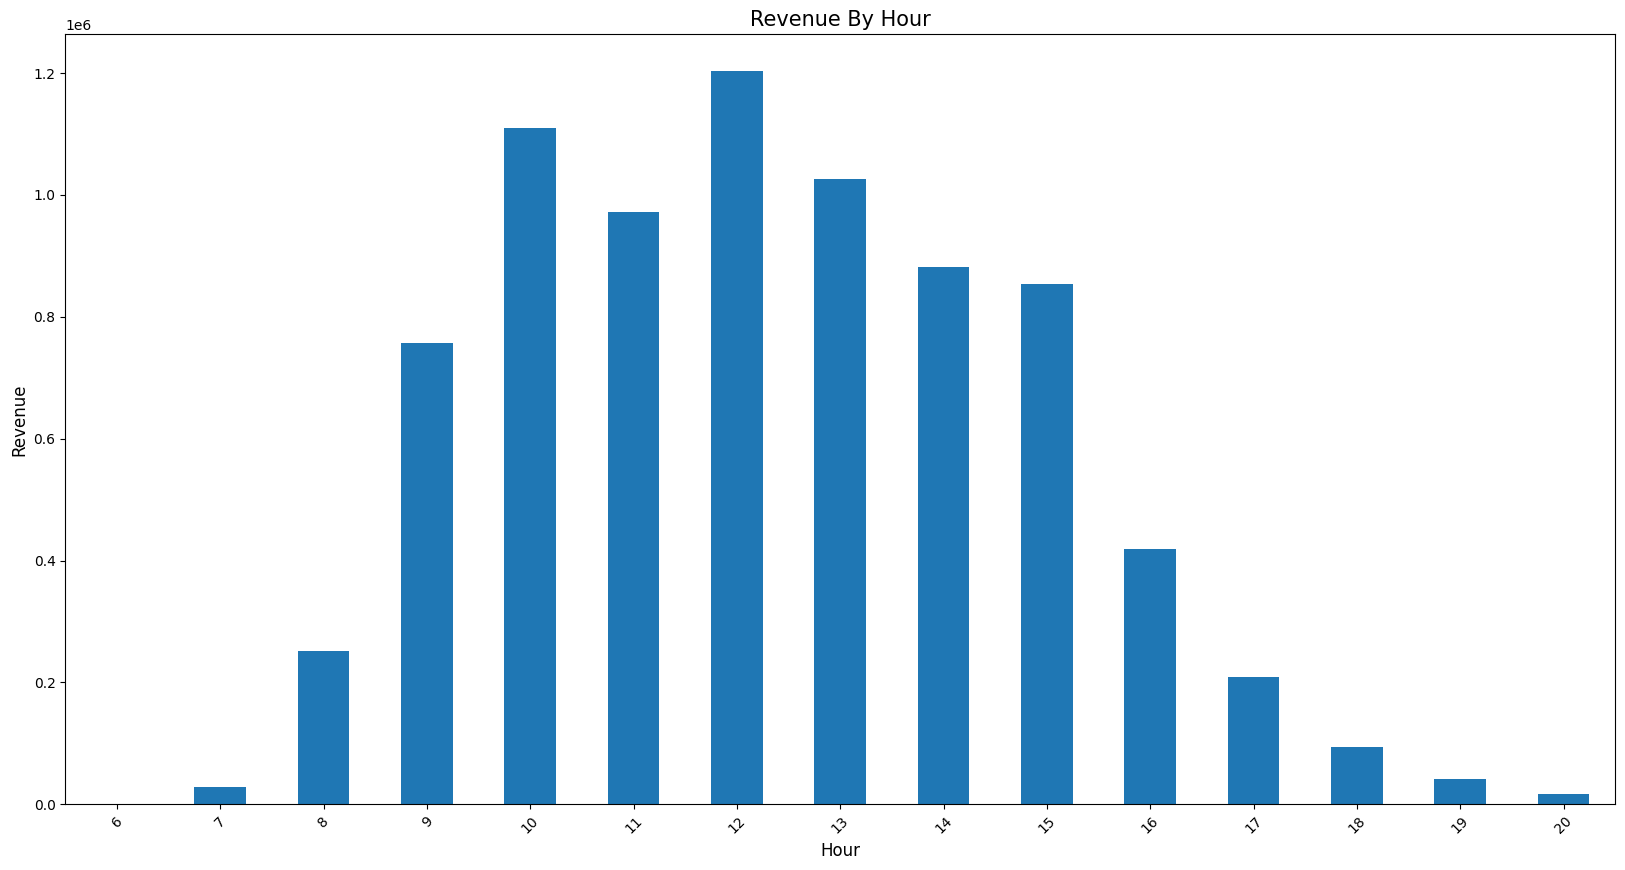

In [83]:
plot_bar(rev_by_hour, "Hour", "Revenue", "Revenue By Hour")

In [85]:
# 판매제품(StockCode) Top 10
# 기준: Quantity

In [87]:
retail["StockCode"].info()

<class 'pandas.core.series.Series'>
Int64Index: 304911 entries, 0 to 541908
Series name: StockCode
Non-Null Count   Dtype 
--------------   ----- 
304911 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [95]:
# rev_by_dow = retail.set_index("InvoiceDate").groupby(lambda date: date.dayofweek)["CheckoutPrice"].sum() # 람다 사용
# retail.groupby("StockCode").sum().sort_values(ascending=False)[:10]
stockCode_Top_10 = retail.set_index("StockCode").groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)
stockCode_Top_10

StockCode
23843     80995
23166     77916
85099B    46181
85123A    36782
84879     35362
23084     27202
21915     20939
22178     20321
22386     20165
23203     19516
Name: Quantity, dtype: int64

In [96]:
# 우수 고객(CustomerID) Top 10
# 지불금액: CheckoutPrice

In [100]:
# retail.groupby("CustomerID")["CheckoutPrice"].sum().sort_values(ascending=False)[:10]
customerID_Top_10 = retail.set_index("CustomerID").groupby("CustomerID")["CheckoutPrice"].sum().sort_values(ascending=False).head(10)
customerID_Top_10

CustomerID
18102.0    257518.90
14646.0    241148.31
17450.0    192236.59
16446.0    168472.50
14911.0    125365.19
12415.0    110334.21
14156.0    107573.14
17511.0     77796.46
12346.0     77183.60
16029.0     76512.84
Name: CheckoutPrice, dtype: float64

# 데이터로부터 lnsight
* 전체 매출의 약 82%가 UK에서 발생
* 11년도에 가장 많은 매출이 발생한 달은 11월
* 매출은 꾸준히 성장(11년 12월 데이터는 9일까지만 포함)
* 토요일은 영업을 하지 않음
* 새벽 6시에 오픈, 오후 9시에 마감이 예상
* 일주일 중 목요일까지는 성장세를 보이고, 이후 하락